## What is Self-RAG?

Think of Self-RAG like a really smart student taking a test. Before answering each question, the student decides: "Do I already know this, or should I look it up in my textbook?" If they need to look something up, they check if the information they found is actually helpful, then give the best possible answer.

Self-RAG works the same way - it's an AI system that can decide whether it needs to search for information before answering your questions.

## Why Do We Need This?

Imagine you ask an AI two different questions:
- "What's 2 + 2?" (Easy - no need to look anything up)
- "What's the latest news about climate change?" (Complex - better look up recent information)

**The Problem**: Many AI systems either:
- Always look things up (even for simple math) - which is slow and unnecessary
- Never look things up (even for recent events) - which can give outdated or wrong answers

**Self-RAG's Solution**: Be smart about when to search and when not to!

## How Does Self-RAG Work? (Step by Step)

Let's follow what happens when you ask: *"What are the health benefits of drinking green tea?"*

### Step 1: Should I Look This Up?
The system thinks: *"This question is about health facts that I should verify with reliable sources. YES, I should look this up."*

### Step 2: Find Information
The system searches through a database of articles, research papers, and reliable websites about green tea and health.

### Step 3: Check If Information Is Useful
The system looks at what it found and asks: *"Is this information actually about green tea's health benefits, or is it about something else entirely?"* It keeps only the relevant information.

### Step 4: Create an Answer
Using the good information it found, the system writes several possible answers to your question.

### Step 5: Check the Answer Quality
The system asks itself two important questions:
- *"Is my answer actually supported by the information I found?"* (No making things up!)
- *"How helpful is this answer to the person who asked the question?"* (Is it useful?)

### Step 6: Pick the Best Answer
Finally, it chooses the answer that is both well-supported by evidence and most helpful to you.

## Real-World Example

**Your Question**: "How do I reset my iPhone?"

**Self-RAG's Process**:
1. **Should I look this up?** *"This is a technical question that might have changed with new iOS versions. YES, let me check current instructions."*
2. **Search**: Finds current Apple support documentation
3. **Check relevance**: *"Yes, these are official iPhone reset instructions"*
4. **Generate answer**: Creates step-by-step instructions
5. **Verify quality**: *"This answer is supported by official Apple docs and directly answers the question"*
6. **Final answer**: Gives you accurate, up-to-date reset instructions

## Why Is This Better?

### **Smart Decision Making**
- Doesn't waste time looking up simple things like "What color is the sky?"
- Does look up complex or changing information like "Current COVID-19 guidelines"

### **Quality Control**
- Double-checks that answers are actually supported by reliable sources
- Makes sure answers are helpful, not just technically correct

### **Flexibility**
- Can work with or without looking things up
- Adapts to different types of questions

### **More Accurate**
- Reduces hallucinations (making things up)
- Bases answers on verified information when needed

## Think of It Like...

**A Good Research Assistant**: Self-RAG is like having a research assistant who:
- Knows when they need to check sources vs. when they already know the answer
- Only brings you relevant information (not random stuff)
- Double-checks their work before giving you the final answer
- Always tries to give you the most helpful response possible

## The Bottom Line

Self-RAG makes AI systems smarter by teaching them to think before they answer. Just like how the best students know when to rely on their memory versus when to consult their textbooks, Self-RAG helps AI give you better, more reliable answers by being strategic about when and how to use additional information.

![Self RAG Flow.png](<attachment:Self RAG Flow.png>)

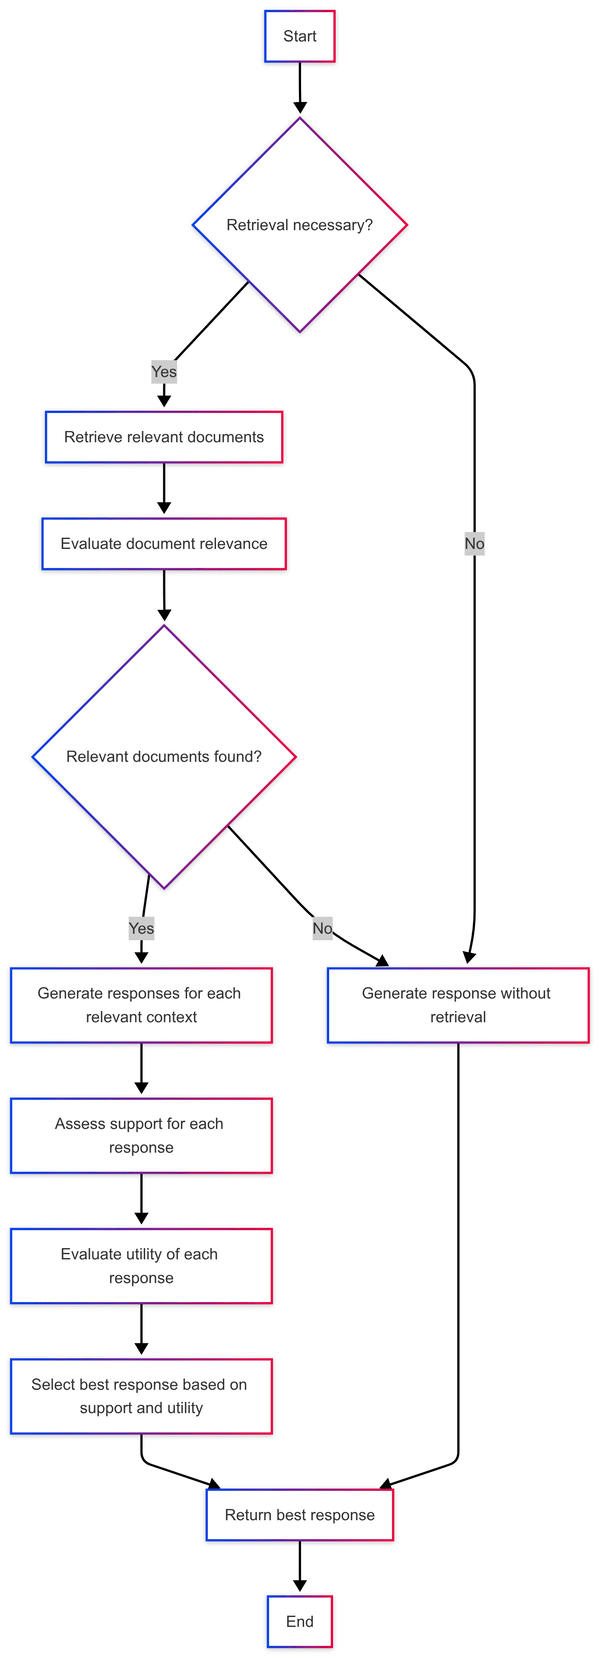

## Key Components

1. **Retrieval Decision**: Determines if retrieval is necessary for a given query.
2. **Document Retrieval**: Fetches potentially relevant documents from a vector store.
3. **Relevance Evaluation**: Assesses the relevance of retrieved documents to the query.
4. **Response Generation**: Generates responses based on relevant contexts.
5. **Support Assessment**: Evaluates how well the generated response is supported by the context.
6. **Utility Evaluation**: Rates the usefulness of the generated response.

## Method Details

1. **Retrieval Decision**: The algorithm first decides if retrieval is necessary for the given query. This step prevents unnecessary retrieval for queries that can be answered directly.

2. **Document Retrieval**: If retrieval is deemed necessary, the algorithm fetches the top-k most similar documents from a vector store.

3. **Relevance Evaluation**: Each retrieved document is evaluated for its relevance to the query. This step filters out irrelevant information, ensuring that only pertinent context is used for generation.

4. **Response Generation**: The algorithm generates responses using the relevant contexts. If no relevant contexts are found, it generates a response without retrieval.

5. **Support Assessment**: Each generated response is evaluated to determine how well it is supported by the context. This step helps in identifying responses that are grounded in the provided information.

6. **Utility Evaluation**: The utility of each response is rated, considering how well it addresses the original query.

7. **Response Selection**: The final step involves selecting the best response based on the support assessment and utility evaluation.

## Benefits of the Approach

1. **Dynamic Retrieval**: By deciding whether retrieval is necessary, the system can adapt to different types of queries efficiently.

2. **Relevance Filtering**: The relevance evaluation step ensures that only pertinent information is used, reducing noise in the generation process.

3. **Quality Assurance**: The support assessment and utility evaluation provide a way to gauge the quality of generated responses.

4. **Flexibility**: The system can generate responses with or without retrieval, adapting to the available information.

5. **Improved Accuracy**: By grounding responses in relevant retrieved information and assessing their support, the system can produce more accurate outputs.

# Package Installation and Imports

The cell below installs all necessary packages required to run this notebook.


In [ ]:
# Install required packages
!pip install langchain langchain-openai pypdf openai chromadb numpy

In [ ]:
import os
# Set up tracking for LangChain (optional - helps you see what's happening behind the scenes)
os.environ['LANGSMITH_TRACING'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = '<your-langsmith-api-key>'

os.environ["OPENAI_API_KEY"] = "<>your-openai-api-key>"

### Download PDF Documents
[MachineLearning-Lecture01](https://see.stanford.edu/materials/aimlcs229/transcripts/machinelearning-lecture01.pdf), 
[MachineLearning-Lecture02](https://see.stanford.edu/materials/aimlcs229/transcripts/MachineLearning-Lecture02.pdf), 
[MachineLearning-Lecture03](https://see.stanford.edu/materials/aimlcs229/transcripts/MachineLearning-Lecture03.pdf)
   

In [ ]:

from langchain.prompts import PromptTemplate
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from pydantic import BaseModel, Field
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma

# Update this path to where your PDFs are stored
source_path = r"C:\Users\Heet Chauhan\Downloads"

loaders = [
    # First lecture PDF (added twice to simulate real-world messy data)
    PyPDFLoader(os.path.join(source_path, "MachineLearning-Lecture01.pdf")),
    PyPDFLoader(os.path.join(source_path, "MachineLearning-Lecture02.pdf")),
    PyPDFLoader(os.path.join(source_path, "MachineLearning-Lecture03.pdf"))
]

docs = []

# Load each PDF and add its pages to our docs list
for i, loader in enumerate(loaders):
    print(f"📄 Loading PDF {i+1}/4...")
    # Each PDF might have multiple pages, so we extend (not append) the list
    docs.extend(loader.load())


text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,      # Each chunk will be about 1500 characters long
    chunk_overlap=150     # Overlap between chunks to maintain context
)

splits = text_splitter.split_documents(docs)

embedding = OpenAIEmbeddings()

persist_directory = 'docs/chroma/'

vectorstore = Chroma.from_documents(
    documents=splits,              # Our document chunks
    embedding=embedding,           # The embedding model to convert text to vectors
    persist_directory=persist_directory  # Where to save the database
)

llm = ChatOpenAI(model="gpt-4o-mini", max_tokens=1000, temperature=0) #type: ignore

### Defining prompt templates

In [ ]:
class RetrievalResponse(BaseModel):
    response: str = Field(..., title="Determines if retrieval is necessary", description="Output only 'Yes' or 'No'.")

class RelevanceResponse(BaseModel):
    response: str = Field(..., title="Determines if context is relevant", description="Output only 'Relevant' or 'Irrelevant'.")

class GenerationResponse(BaseModel):
    response: str = Field(..., title="Generated response", description="The generated response.")

class SupportResponse(BaseModel):
    response: str = Field(..., title="Determines if response is supported", description="Output 'Fully supported', 'Partially supported', or 'No support'.")

class UtilityResponse(BaseModel):
    response: int = Field(..., title="Utility rating", description="Rate the utility of the response from 1 to 5.")

# Your prompts remain the same
retrieval_prompt = PromptTemplate(
    input_variables=["query"],
    template="Given the query '{query}', determine if retrieval is necessary. Output only 'Yes' or 'No'."
)

relevance_prompt = PromptTemplate(
    input_variables=["query", "context"],
    template="Given the query '{query}' and the context '{context}', determine if the context is relevant. Output only 'Relevant' or 'Irrelevant'."
)

generation_prompt = PromptTemplate(
    input_variables=["query", "context"],
    template="Given the query '{query}' and the context '{context}', generate a response."
)

support_prompt = PromptTemplate(
    input_variables=["response", "context"],
    template="Given the response '{response}' and the context '{context}', determine if the response is supported by the context. Output 'Fully supported', 'Partially supported', or 'No support'."
)

utility_prompt = PromptTemplate(
    input_variables=["query", "response"],
    template="Given the query '{query}' and the response '{response}', rate the utility of the response from 1 to 5."
)

# Create LLMChains - these should work without issues now
retrieval_chain = retrieval_prompt | llm.with_structured_output(RetrievalResponse)
relevance_chain = relevance_prompt | llm.with_structured_output(RelevanceResponse)
generation_chain = generation_prompt | llm.with_structured_output(GenerationResponse)
support_chain = support_prompt | llm.with_structured_output(SupportResponse)
utility_chain = utility_prompt | llm.with_structured_output(UtilityResponse)

### Defining the self RAG logic flow

In [ ]:
def self_rag(query, vectorstore, top_k=3):
    print(f"\nProcessing query: {query}")
    
    # Step 1: Determine if retrieval is necessary
    print("Step 1: Determining if retrieval is necessary...")
    input_data = {"query": query}
    retrieval_decision = retrieval_chain.invoke(input_data).response.strip().lower()
    print(f"Retrieval decision: {retrieval_decision}")
    
    if retrieval_decision == 'yes':
        # Step 2: Retrieve relevant documents
        print("Step 2: Retrieving relevant documents...")
        docs = vectorstore.similarity_search(query, k=top_k)
        contexts = [doc.page_content for doc in docs]
        print(f"Retrieved {len(contexts)} documents")
        
        # Step 3: Evaluate relevance of retrieved documents
        print("Step 3: Evaluating relevance of retrieved documents...")
        relevant_contexts = []
        for i, context in enumerate(contexts):
            input_data = {"query": query, "context": context}
            relevance = relevance_chain.invoke(input_data).response.strip().lower() #type: ignore
            print(f"Document {i+1} relevance: {relevance}")
            if relevance == 'relevant':
                relevant_contexts.append(context)
        
        print(f"Number of relevant contexts: {len(relevant_contexts)}")
        
        # If no relevant contexts found, generate without retrieval
        if not relevant_contexts:
            print("No relevant contexts found. Generating without retrieval...")
            input_data = {"query": query, "context": "No relevant context found."}
            return generation_chain.invoke(input_data).response #type: ignore
        
        # Step 4: Generate response using relevant contexts
        print("Step 4: Generating responses using relevant contexts...")
        responses = []
        for i, context in enumerate(relevant_contexts):
            print(f"Generating response for context {i+1}...")
            input_data = {"query": query, "context": context}
            response = generation_chain.invoke(input_data).response #type: ignore
            
            # Step 5: Assess support
            print(f"Step 5: Assessing support for response {i+1}...")
            input_data = {"response": response, "context": context}
            support = support_chain.invoke(input_data).response.strip().lower()
            print(f"Support assessment: {support}")
            
            # Step 6: Evaluate utility
            print(f"Step 6: Evaluating utility for response {i+1}...")
            input_data = {"query": query, "response": response}
            utility = int(utility_chain.invoke(input_data).response) #type: ignore
            print(f"Utility score: {utility}")
            
            responses.append((response, support, utility))
        
        # Select the best response based on support and utility
        print("Selecting the best response...")
        best_response = max(responses, key=lambda x: (x[1] == 'fully supported', x[2]))
        print(f"Best response support: {best_response[1]}, utility: {best_response[2]}")
        return best_response[0]
    else:
        # Generate without retrieval
        print("Generating without retrieval...")
        input_data = {"query": query, "context": "No retrieval necessary."}
        return generation_chain.invoke(input_data).response #type: ignore

### Test the self-RAG function easy query with high relevance


In [ ]:
query = "What are major topics for this class?"
response = self_rag(query, vectorstore)

print("\nFinal response:")
print(response)

### Test the self-RAG function with a more challenging query with low relevance


In [ ]:
query = "What are few main formulas in statistics?"
response = self_rag(query, vectorstore)

print("\nFinal response:")
print(response)

![](https://europe-west1-rag-techniques-views-tracker.cloudfunctions.net/rag-techniques-tracker?notebook=all-rag-techniques--self-rag)